In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [1]:
import sklearn
sklearn.__version__

'1.3.0'

In [2]:
data=pd.read_csv('dbo_incomes.csv',encoding='latin1')

In [3]:
data.head()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_SubCategory,Income_Month,Income_Year,IncomeValue,Indicator_Type,Income_DataSource
0,Armenia,Aragatsotn,NaN,Agro - Food&Cash Crop,0.0,8,2009,33.592162,Baseline,WFP VAM Impact of the Global Financial Crisis ...
1,Armenia,Aragatsotn,NaN,Asset Sales/Savings/Credit,0.0,8,2009,0.301408,Baseline,WFP VAM Impact of the Global Financial Crisis ...
2,Armenia,Aragatsotn,NaN,Commerce - Business/Trading,0.0,8,2009,3.810976,Baseline,WFP VAM Impact of the Global Financial Crisis ...
3,Armenia,Aragatsotn,NaN,Labor - Artisan/Skilled,0.0,8,2009,9.058316,Baseline,WFP VAM Impact of the Global Financial Crisis ...
4,Armenia,Aragatsotn,NaN,Labor - Daily/Unskilled - Mixed,0.0,8,2009,10.475054,Baseline,WFP VAM Impact of the Global Financial Crisis ...


In [4]:
data.tail()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_SubCategory,Income_Month,Income_Year,IncomeValue,Indicator_Type,Income_DataSource
4365,Yemen,NaN,NaN,Labor - Salary/Regular,0.0,12,2011,33.510186,Baseline,WFP VAM The State of Food Security and Nutriti...
4366,Yemen,NaN,NaN,Non-Wage - Aid/Welfare,0.0,12,2011,2.537681,Baseline,WFP VAM The State of Food Security and Nutriti...
4367,Yemen,NaN,NaN,Non-Wage - Pension/Benefit,0.0,12,2011,2.047048,Baseline,WFP VAM The State of Food Security and Nutriti...
4368,Yemen,NaN,NaN,Non-Wage - Remittance/Fam. Aid,0.0,12,2011,8.875287,Baseline,WFP VAM The State of Food Security and Nutriti...
4369,Yemen,NaN,NaN,Other,0.0,12,2011,2.077772,Baseline,WFP VAM The State of Food Security and Nutriti...


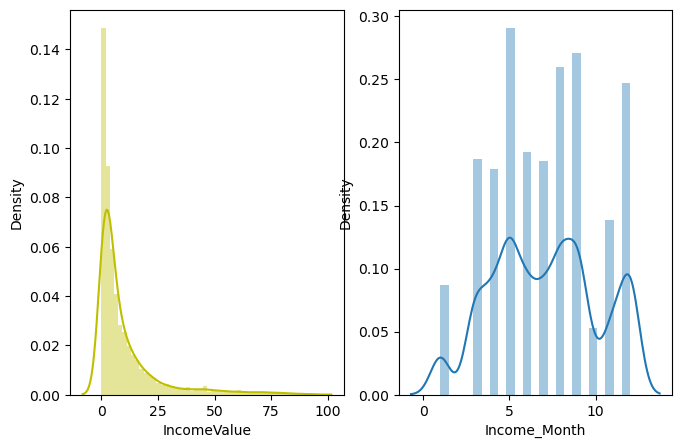

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(131)
sns.distplot(data["IncomeValue"],color="y")
plt.subplot (132)
sns.distplot(data["Income_Month"])
plt.show()

<Axes: xlabel='Income_Month'>

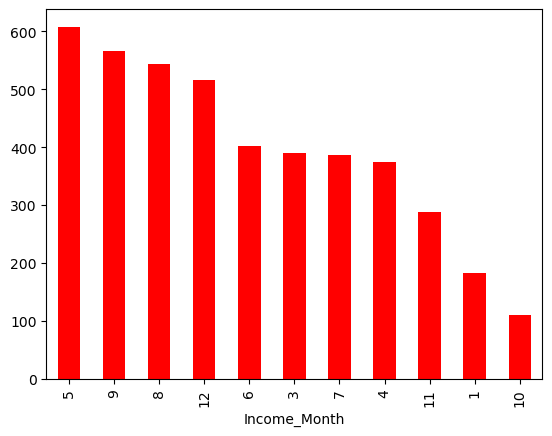

In [6]:
data['Income_Month'].value_counts().plot(kind='bar',color='Red')

<Axes: >

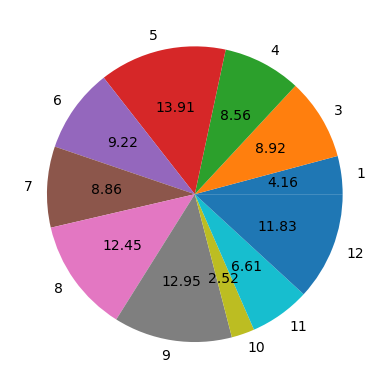

In [7]:
data.groupby('Income_Month').size().plot(kind='pie', autopct='%.2f')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ADM0_NAME           4370 non-null   object 
 1   ADM1_NAME           4022 non-null   object 
 2   ADM2_NAME           423 non-null    object 
 3   Income_Category     4370 non-null   object 
 4   Income_SubCategory  2484 non-null   float64
 5   Income_Month        4370 non-null   int64  
 6   Income_Year         4370 non-null   int64  
 7   IncomeValue         4370 non-null   float64
 8   Indicator_Type      4370 non-null   object 
 9   Income_DataSource   4370 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 341.5+ KB


In [9]:
Income_Sub=data["Income_SubCategory"].median()
data["Income_SubCategory"].fillna(Income_Sub,inplace=True)
ADM1=data["ADM1_NAME"].mode()
data["ADM1_NAME"].fillna(ADM1,inplace=True)
ADM2=data["ADM2_NAME"].mode()
data["ADM2_NAME"].fillna(ADM2,inplace=True)

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['ADM0_NAME'] = label_encoder.fit_transform(data['ADM0_NAME'])
data['ADM1_NAME'] = label_encoder.fit_transform(data['ADM1_NAME'])
data['ADM2_NAME'] = label_encoder.fit_transform(data['ADM2_NAME'])
data['Income_Category'] = label_encoder.fit_transform(data['Income_Category'])
data['Indicator_Type'] = label_encoder.fit_transform(data['Indicator_Type'])
data['Income_DataSource'] = label_encoder.fit_transform(data['Income_DataSource'])



In [11]:
data.corr()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_SubCategory,Income_Month,Income_Year,IncomeValue,Indicator_Type,Income_DataSource
ADM0_NAME,1.000000,-0.059339,-0.273639,-0.018513,NaN,0.272037,0.080278,0.030351,0.116641,0.474896
ADM1_NAME,-0.059339,1.000000,0.249474,0.022978,NaN,-0.004813,-0.102441,-0.012336,0.070247,-0.090191
ADM2_NAME,-0.273639,0.249474,1.000000,0.072786,NaN,0.209335,-0.141188,-0.071031,0.043497,-0.086121
Income_Category,-0.018513,0.022978,0.072786,1.000000,NaN,0.008226,0.003344,-0.323388,0.028638,-0.000819
Income_SubCategory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Month,0.272037,-0.004813,0.209335,0.008226,NaN,1.000000,-0.213444,-0.000927,-0.314151,0.240292
Income_Year,0.080278,-0.102441,-0.141188,0.003344,NaN,-0.213444,1.000000,-0.061851,-0.113904,-0.078347
IncomeValue,0.030351,-0.012336,-0.071031,-0.323388,NaN,-0.000927,-0.061851,1.000000,-0.016495,0.032015
Indicator_Type,0.116641,0.070247,0.043497,0.028638,NaN,-0.314151,-0.113904,-0.016495,1.000000,0.125670
Income_DataSource,0.474896,-0.090191,-0.086121,-0.000819,NaN,0.240292,-0.078347,0.032015,0.125670,1.000000


<Axes: >

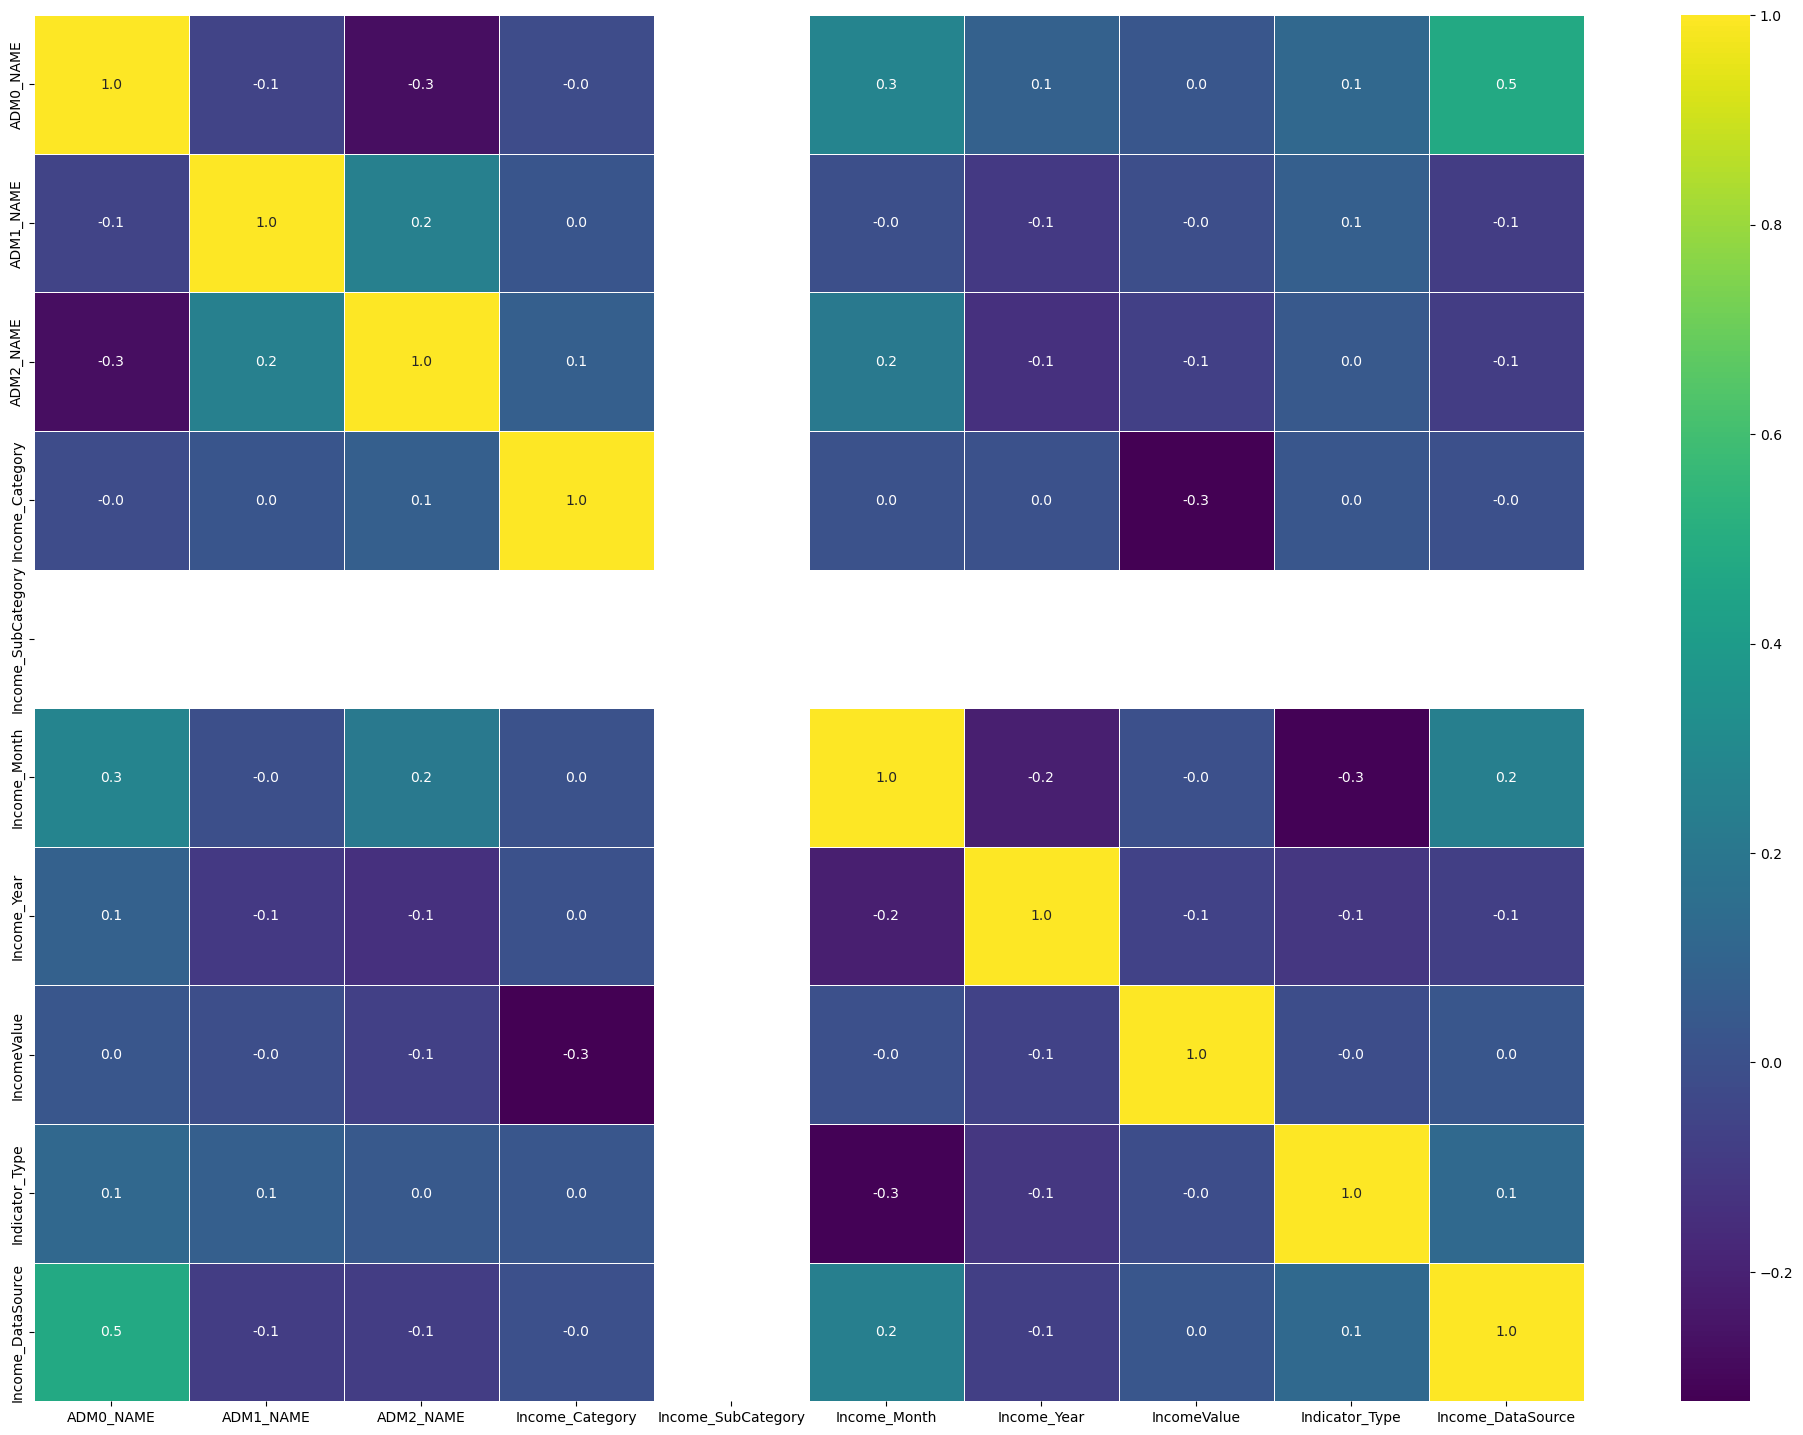

In [12]:
plt.figure(figsize = (25,18))
sns.heatmap(data.corr(), annot = True , cmap = 'viridis', linewidth = 0.5 , fmt = '.1f')

<Axes: >

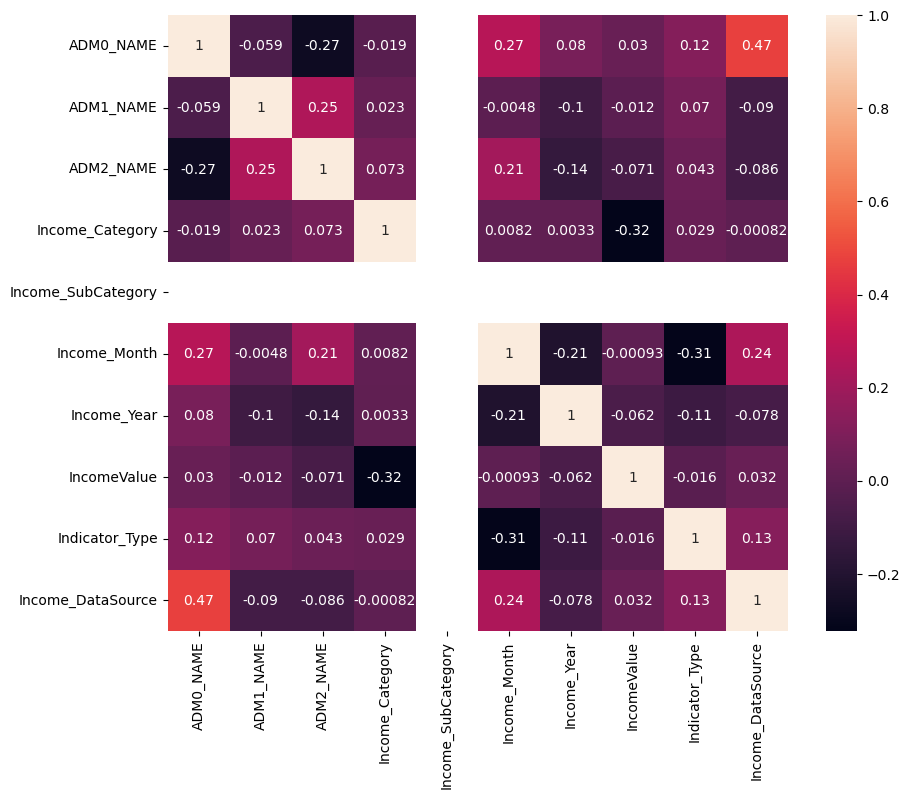

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True,  ax=ax)

In [14]:
data.describe(include='all')

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_SubCategory,Income_Month,Income_Year,IncomeValue,Indicator_Type,Income_DataSource
count,4370.000000,4370.000000,4370.000000,4370.000000,4370.0,4370.000000,4370.000000,4370.000000,4370.000000,4370.000000
mean,15.924714,194.181236,53.361098,12.452174,0.0,7.081007,2010.365675,10.114416,0.024027,15.271167
std,9.518726,111.245487,9.520288,7.437702,0.0,3.037544,1.881452,14.678526,0.153152,9.650919
min,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2006.000000,0.006676,0.000000,0.000000
25%,7.000000,96.000000,56.000000,5.000000,0.0,5.000000,2009.000000,1.666667,0.000000,7.000000
50%,17.000000,192.500000,56.000000,13.000000,0.0,7.000000,2010.000000,4.494230,0.000000,15.000000
75%,25.000000,293.000000,56.000000,19.000000,0.0,9.000000,2012.000000,11.809657,0.000000,24.000000
max,31.000000,363.000000,56.000000,25.000000,0.0,12.000000,2014.000000,93.333333,1.000000,31.000000


In [15]:
data.isnull()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_SubCategory,Income_Month,Income_Year,IncomeValue,Indicator_Type,Income_DataSource
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4365,False,False,False,False,False,False,False,False,False,False
4366,False,False,False,False,False,False,False,False,False,False
4367,False,False,False,False,False,False,False,False,False,False
4368,False,False,False,False,False,False,False,False,False,False


In [16]:
data.shape

(4370, 10)

In [17]:
data.isna().sum()

ADM0_NAME             0
ADM1_NAME             0
ADM2_NAME             0
Income_Category       0
Income_SubCategory    0
Income_Month          0
Income_Year           0
IncomeValue           0
Indicator_Type        0
Income_DataSource     0
dtype: int64

In [18]:
y = data['Income_Month']
x = data.drop(columns = ['Income_Month','Income_SubCategory','Indicator_Type'])

In [19]:
#scaling
from sklearn.preprocessing import StandardScaler

In [20]:
scale = StandardScaler()

In [21]:
names=x.columns

In [22]:
x=scale.fit_transform(x)

In [23]:
x

array([[-1.67317944, -1.19732027, -0.87834056, ..., -0.72594545,
         1.59964515,  1.11181755],
       [-1.67317944, -1.19732027, -0.7732897 , ..., -0.72594545,
        -0.66860474,  1.11181755],
       [-1.67317944, -1.19732027, -0.66823884, ..., -0.72594545,
        -0.42948196,  1.11181755],
       ...,
       [ 1.58393166,  1.51770726,  0.27721888, ...,  0.33718512,
        -0.54966637,  1.5263333 ],
       [ 1.58393166,  1.51770726,  0.27721888, ...,  0.33718512,
        -0.08442752,  1.5263333 ],
       [ 1.58393166,  1.51770726,  0.27721888, ...,  0.33718512,
        -0.54757298,  1.5263333 ]])

In [24]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3496, 7)
(874, 7)
(3496,)
(874,)


In [27]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=7)
rf.fit(x_train, y_train)
y_pred_test_rf = rf.predict(x_test)

rf_r2_test = r2_score(y_test, y_pred_test_rf)
print("Random Forest Test R-squared:", rf_r2_test)
training_r2_rf = rf.score(x_train, y_train)
print("Random Forest Training R-squared:", training_r2_rf)

Random Forest Test R-squared: 0.8722240059413364
Random Forest Training R-squared: 0.8797212929670563


In [29]:
data

,ADM0_NAME,ADM1_NAME,ADM2_NAME,Income_Category,Income_SubCategory,Income_Month,Income_Year,IncomeValue,Indicator_Type,Income_DataSource
0,0,61,45,4,0.0,8,2009,33.592162,0,26
1,0,61,46,8,0.0,8,2009,0.301408,0,26
2,0,61,47,9,0.0,8,2009,3.810976,0,26
3,0,61,56,13,0.0,8,2009,9.058316,0,26
4,0,61,56,15,0.0,8,2009,10.475054,0,26
...,...,...,...,...,...,...,...,...,...,...
4365,31,363,56,17,0.0,12,2011,33.510186,0,30
4366,31,363,56,19,0.0,12,2011,2.537681,0,30
4367,31,363,56,20,0.0,12,2011,2.047048,0,30
4368,31,363,56,21,0.0,12,2011,8.875287,0,30


In [30]:
rf.predict([[0,61,45,4,2009,33.592162,26]])

array([8.4639338])

In [31]:
rf.predict([[0,61,47,9,2009,3.810976,26]])

array([8.4639338])

In [32]:
rf.predict([[0,61,56,13,2009,9.058316,26]])

array([8.4639338])

In [33]:
import pickle

In [34]:
pickle.dump(rf,open("rf.pkl", "wb"))